In [1]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Hyperparameter Tuning

In [3]:
# Hyperparamteter tuning

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# Features and target

X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [5]:
# Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
# Setup the paramteres and distribution to sample from: param_dist

param_dist = {'max_depth': [3,None],
              'min_samples_leaf': randint(1,9),
              'criterion': ['gini', 'entropy']}

In [8]:
# Instantiate a Decision Tree Classifier: clf

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [9]:
# Instantiate a Randomized Grid Search object: clf_cv

clf_cv = RandomizedSearchCV(clf, param_dist, cv=5)

In [10]:
# Fit it with the data

clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbda8fdbfa0>})

In [11]:
# Print the tuned parameters and score

display(f'Mejores parámetros para el clasificador: {clf_cv.best_params_}')
display(f'Mejor score para el clasificador: {clf_cv.best_score_}')

"Mejores parámetros para el clasificador: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7}"

'Mejor score para el clasificador: 0.9'

In [12]:
# Predicting the Test set results

y_pred = clf_cv.predict(X_test)

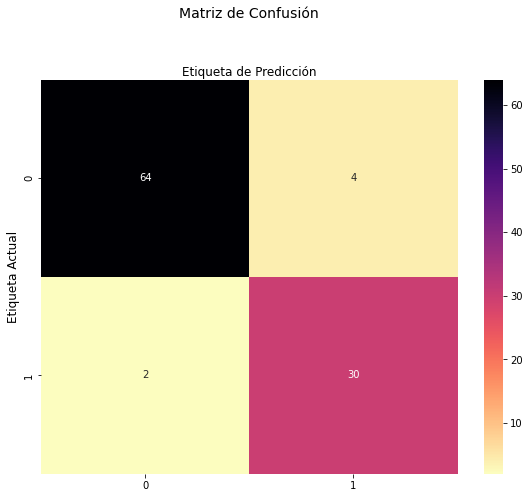

In [13]:
# Making Confusion Matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix

class_names = [0,1]
fig,ax = plt.subplots(figsize=(8,7)) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='magma_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de Confusión\n', y=1.1, fontsize=14)
plt.ylabel('Etiqueta Actual', fontsize=12)
plt.xlabel('Etiqueta de Predicción', fontsize=12)
plt.tight_layout();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>